In [1]:
from chebGreen.greenlearning.utils import DataProcessor
from chebGreen.greenlearning.model import *
import matplotlib.pyplot as plt

%env TF_MLC_LOGGING=1
%env TF_CPP_MIN_LOG_LEVEL=2

env: TF_MLC_LOGGING=1
env: TF_CPP_MIN_LOG_LEVEL=2


In [2]:
data = DataProcessor("datasets/laplace/data.mat")
data.generateDataset(valRatio = 0.95, batch_size = 128)

Metal device set to: Apple M1 Pro


In [3]:
model = GreenNN()
model.build()

Using tensorflow 2.9.0


In [4]:
lossHistory = model.train(data, epochs = 3000)

Loss at epoch 100: Training = 3.533E-02, Validation = 4.255E-02
Loss at epoch 200: Training = 7.565E-03, Validation = 1.161E-02
Loss at epoch 300: Training = 2.231E-03, Validation = 3.626E-03
Loss at epoch 400: Training = 1.127E-03, Validation = 1.787E-03
Loss at epoch 500: Training = 7.726E-04, Validation = 1.130E-03
Loss at epoch 600: Training = 5.764E-04, Validation = 8.923E-04
Loss at epoch 700: Training = 6.799E-04, Validation = 9.106E-04
Loss at epoch 800: Training = 4.077E-04, Validation = 6.996E-04
Loss at epoch 900: Training = 3.386E-04, Validation = 6.081E-04
Loss at epoch 1000: Training = 2.819E-04, Validation = 5.248E-04
Loss at epoch 1100: Training = 2.593E-04, Validation = 4.856E-04
Loss at epoch 1200: Training = 2.186E-04, Validation = 4.171E-04
Loss at epoch 1300: Training = 1.886E-04, Validation = 3.615E-04
Loss at epoch 1400: Training = 1.862E-04, Validation = 3.454E-04
Loss at epoch 1500: Training = 1.600E-04, Validation = 3.033E-04
Loss at epoch 1600: Training = 1.4

In [5]:
xF, xU = data.xF, data.xU
x, y = np.meshgrid(xU, xF)
G = model.evaluateG(x,y)

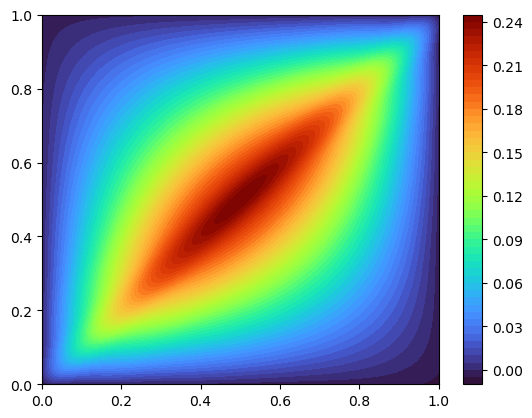

In [6]:
plt.figure()
plt.contourf(x,y,G, 50, cmap = 'turbo', vmin = np.min(G), vmax = np.max(G))
plt.colorbar()

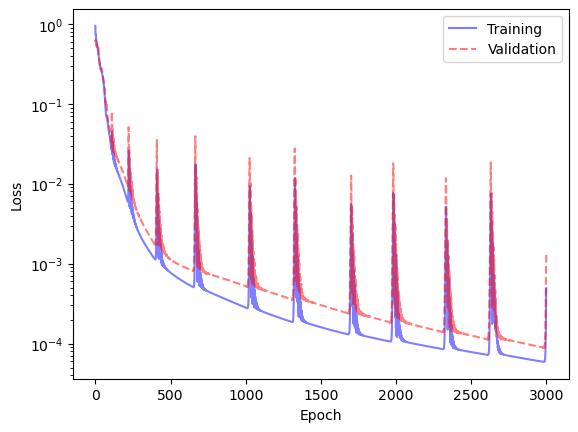

In [7]:
plt.figure()
plt.semilogy(range(len(lossHistory['training'])), lossHistory['training'], 'b', alpha = 0.5)
plt.semilogy(range(len(lossHistory['validation'])), lossHistory['validation'], 'r--', alpha = 0.5)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training','Validation'])

In [8]:
model.saveModels('savedModels/laplace')

INFO:tensorflow:Assets written to: savedModels/laplace/G/assets
INFO:tensorflow:Assets written to: savedModels/laplace/N/assets
